In [1]:
import numpy as np
import pathlib
import os
import matplotlib.pyplot as plt

In [2]:
def interpolate_gaps(values, limit=None):
    """
    Fill gaps using linear interpolation, optionally only fill gaps up to a
    size of `limit`.
    """
    values = np.asarray(values)
    i = np.arange(values.size)
    valid = np.isfinite(values)
    filled = np.interp(i, i[valid], values[valid])

    if limit is not None:
        invalid = ~valid
        for n in range(1, limit+1):
            invalid[:-n] &= invalid[n:]
        filled[invalid] = np.nan

    return filled

destination = "Pupil_Z_csvfiles_interpol_slicedfac100/"

finalfileslist = sorted(os.listdir(destination))

len(finalfileslist)

In [3]:
root = "Pupil_Z_matfiles/"

In [4]:
i = 3

In [5]:
fileslist = sorted(os.listdir(root))


In [6]:
stem = fileslist[i]
stem

'10_103_off-ADHD'

In [7]:
filename = root + stem

In [8]:
filename

'Pupil_Z_matfiles/10_103_off-ADHD'

In [9]:
pupil_time_series = np.genfromtxt(filename, delimiter=',')

In [10]:
pupil_time_series

array([-1.9296 , -1.9289 , -1.9281 , ...,  0.44192,  0.44514,  0.44833])

In [11]:
pupil_time_series_interpol = interpolate_gaps(pupil_time_series, limit=None)


In [12]:
pupil_time_series_interpol_sliced = pupil_time_series_interpol[::100]

In [13]:
len(pupil_time_series_interpol_sliced)

80

In [99]:
pupil_time_series_interpol_sliced_array = np.asarray(pupil_time_series_interpol_sliced)
np.savetxt("Pupil_Z_csvfiles_interpol_slicedfac100/"+"interpol_sliced100_"+stem+".csv", pupil_time_series_interpol_sliced, delimiter=",")

In [100]:
pupil_time_series_check = np.genfromtxt("Pupil_Z_csvfiles_interpol_slicedfac100/interpol_sliced100_10_103_off-ADHD.csv", delimiter=',')

In [101]:
pupil_time_series_check

array([-1.9296  , -1.6688  , -1.2959  , -1.0288  , -0.66656 , -0.24877 ,
        0.086529,  0.48196 ,  1.0992  ,  1.3122  ,  1.2054  ,  1.3956  ,
        1.4769  ,  1.2254  ,  0.8697  ,  0.50253 ,  0.36455 ,  0.44623 ,
        0.45713 ,  0.41944 ,  0.61515 ,  1.0559  ,  1.3955  ,  1.5326  ,
        1.2239  ,  0.38131 , -0.54423 , -1.1861  , -1.5028  , -1.5084  ,
       -1.354   , -1.1056  , -0.81598 , -0.54441 , -0.32579 , -0.029082,
        0.45211 ,  0.92365 ,  1.3185  ,  1.5131  ,  1.2133  ,  0.51522 ,
       -0.079348, -0.44579 , -0.53259 , -0.34795 , -0.18398 , -0.16298 ,
       -0.25087 , -0.45815 , -0.65581 , -0.82864 , -1.0467  , -1.1912  ,
       -1.1578  , -0.98794 , -0.80417 , -0.73805 , -0.74484 , -0.70032 ,
       -0.56459 , -0.38033 , -0.15592 ,  0.14852 ,  0.54665 ,  0.90009 ,
        1.0525  ,  1.0619  ,  0.98155 ,  0.95056 ,  1.18    ,  1.4611  ,
        1.6429  ,  1.7813  ,  1.7758  ,  1.5657  ,  1.212   ,  0.71728 ,
        0.18928 , -0.1852  , -0.61697 , -1.0197  , 

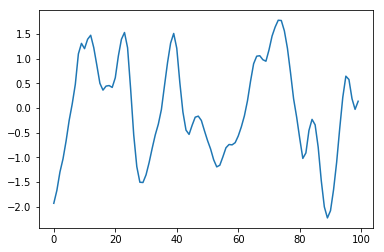

In [102]:
plt.plot(pupil_time_series_check)

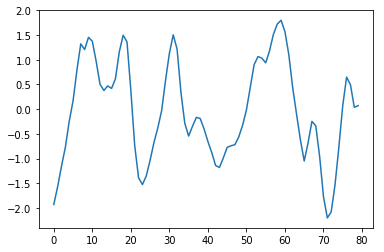

In [14]:
plt.plot(pupil_time_series_interpol_sliced)